## **Importar bibliotecas**

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

## **Ler imagens**

In [15]:
def input_image(img_path, is_gray=False):
   img = cv2.imread(img_path)
   img_new = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) if is_gray else cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
   
   return img_new

In [96]:
img_gray = input_image(os.path.join("..", "Imagens", "Moon.tif"), is_gray=True)

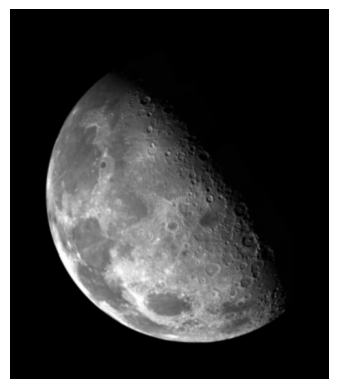

In [97]:
plt.imshow(img_gray, vmin=0, vmax=255, cmap="gray")
plt.axis("off")
plt.show()

## Convolução

$R = w_1 x_1 + w_2 x_2 + ... + w_n x_n = \sum_{i=1}^{n} w_i x_i$

Sendo $w$ uma máscara genérica, o exemplo de uma máscara $w$:

Para uma imagem $f(x,y)$ a convolução gera uma imagem $g(x,y)$

$g(x,y) = \sum_{s=-a}^{a} \sum_{t=-b}^{b} w(s,t) f(x-s,y-t)$

In [98]:
w = np.array([[1, 0, -1], 
              [2, 1, -2], 
              [1, 0, -1]])
w

array([[ 1,  0, -1],
       [ 2,  1, -2],
       [ 1,  0, -1]])

**Algoritmo de convolução de definido da seguinte forma:**

In [99]:
def conv(f, w):
    '''
        Função que executa a convolução em uma imagem
        params:
            - f: (np.array) imagem de entrada
            - w: mascara de convolução
        return:
            - imagem g com convolução
    '''
    #Coleta a largura e altura da imagem
    N, M = f.shape #(Y, X)
    #Coleta a largura e altura da máscara w
    n, m = w.shape
    # coleta dos parametros a e b da mascara
    a = int((n-1)/2)
    b = int((m-1)/2)
    #cria uma imagem g similar a f
    g = np.empty_like(f)
    #processo de convolução da image 
    for x in range(a, N-a):
        for y in range(b, M-b):
            g[x, y] = np.sum(np.multiply(w, f[x-a: x+a+1, y-b:y+b+1]))
    
    return g.astype(np.uint8)

In [100]:
conv_img = conv(img_gray, w)

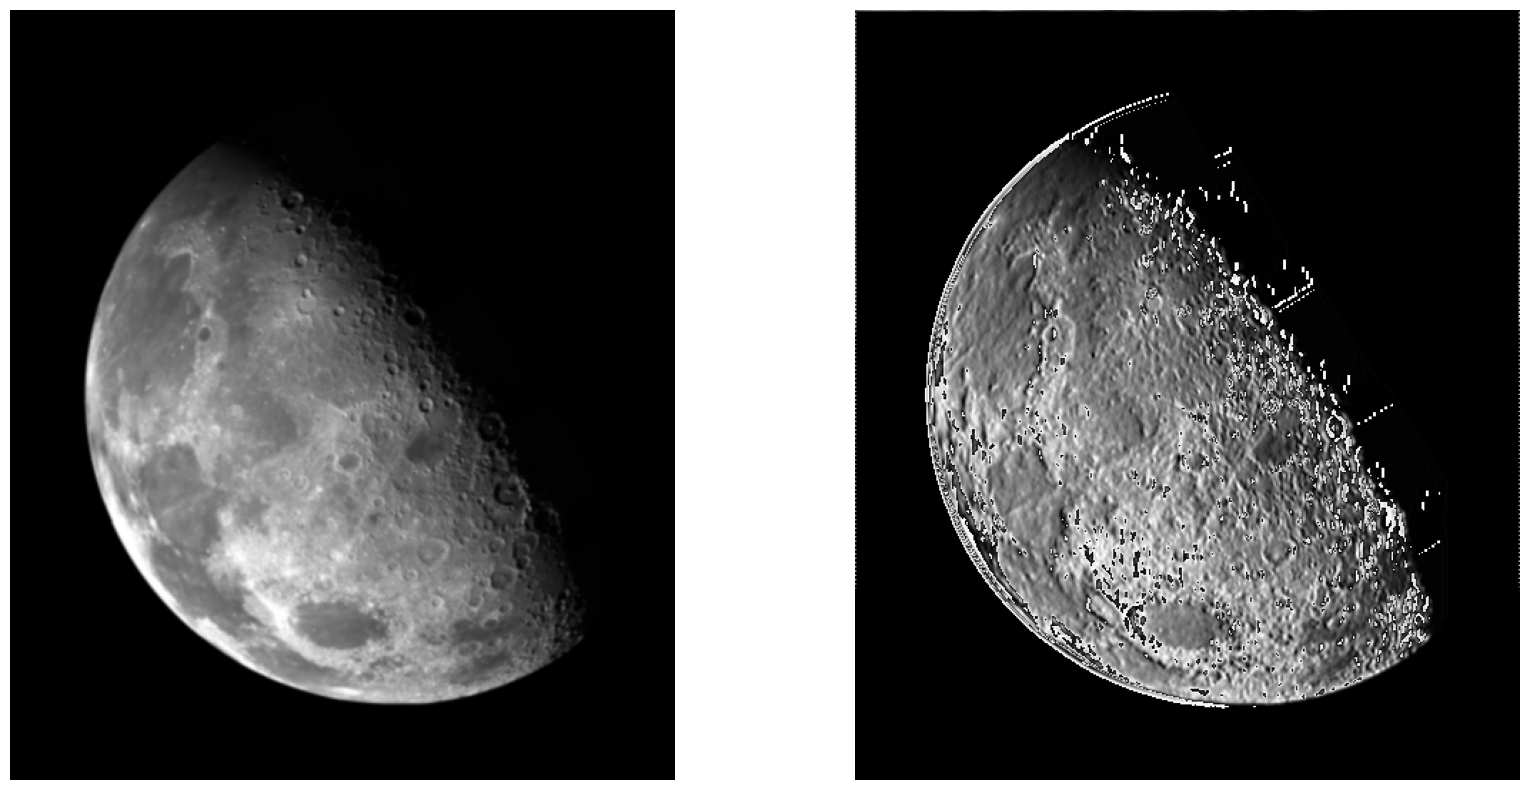

In [101]:
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.imshow(img_gray, vmin=0, vmax=255, cmap="gray")
plt.axis("off")

plt.subplot(122)
plt.imshow(conv_img,vmin=0, vmax=255, cmap="gray")
plt.axis("off")

plt.show()

## Filtros de suaviazação

In [ ]:
img_gray = input_image(os.path.join("..", "Imagens", "Cameraman.tif"), is_gray=True)